**Importing Libraries**

In [64]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

**Loading the datasets**

In [2]:
(train_x, train_y),(test_x, test_y) = mnist.load_data()

**Basic Pre-processing**

In [3]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
train_x = train_x/255.0
test_x = test_x/255.0

**CNN model using Keras**

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), name='conv_1'))
model.add(BatchNormalization(name='batch_norm_1'))

model.add(Conv2D(64, (3,3), name='conv_2'))
model.add(BatchNormalization(name='batch_norm_2'))
model.add(MaxPooling2D(pool_size=(2,2), name='max_pool_1'))

model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(BatchNormalization(name='batch_norm_3'))

model.add(Dense(10, activation='softmax', name='dense_2'))

model.compile(loss= 'categorical_crossentropy' , optimizer= keras.optimizers.Adadelta(), metrics=['accuracy'])

**Training the model**

In [16]:
train = model.fit(train_x, keras.utils.to_categorical(train_y), batch_size=128, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 123us/step - loss: 0.1527 - acc: 0.9559 - val_loss: 0.0797 - val_acc: 0.9779
Epoch 2/5
48000/48000 [==============================] - 5s 106us/step - loss: 0.0545 - acc: 0.9838 - val_loss: 0.0593 - val_acc: 0.9817
Epoch 3/5
48000/48000 [==============================] - 5s 106us/step - loss: 0.0298 - acc: 0.9914 - val_loss: 0.0774 - val_acc: 0.9751
Epoch 4/5
48000/48000 [==============================] - 5s 106us/step - loss: 0.0158 - acc: 0.9961 - val_loss: 0.0606 - val_acc: 0.9817
Epoch 5/5
48000/48000 [==============================] - 5s 107us/step - loss: 0.0083 - acc: 0.9983 - val_loss: 0.0461 - val_acc: 0.9862


In [17]:
model.save_weights('weights.h5')

In [20]:
new_model = Sequential()

new_model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), name='conv_1', trainable= False))
new_model.add(BatchNormalization(name='batch_norm_1', trainable= False))

new_model.add(Conv2D(64, (3,3), name='conv_2', trainable= False))
new_model.add(BatchNormalization(name='batch_norm_2', trainable= False))
new_model.add(MaxPooling2D(pool_size=(2,2), name='max_pool_1', trainable= False))

new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', name='dense_1', trainable= False))
new_model.add(BatchNormalization(name='batch_norm_3', trainable= False))

new_model.add(Dense(10, activation='softmax', name='dense_2'))

new_model.compile(loss= 'categorical_crossentropy' , optimizer= keras.optimizers.Adadelta(), metrics=['accuracy'])

In [21]:
new_model.load_weights('weights.h5', by_name=True)

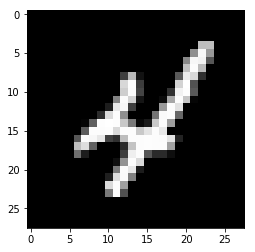

In [98]:
#train_generator[0][0][0].shape
plt.imshow(train_x[9].reshape(28, 28),cmap='gray', vmin=0, vmax=1 )
#train_x[0].reshape(28, 28).shape

In [62]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    data_format = 'channels_last')

train_generator = train_datagen.flow_from_directory('./Numeral/train/',
                                                   target_size = (28,28),
                                                   batch_size = 8,
                                                   color_mode = 'grayscale',
                                                   class_mode = 'categorical')

Found 99 images belonging to 10 classes.


In [115]:
print(np.min(train_generator[0][0]))

0.22352943


**Graphical Representation of Loss Curve**

In [ ]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Loss Curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validate'], loc = 'upper right')
plt.show()

**Evaluation on Test Data**

In [72]:
print('Accuracy on test data = ', new_model.evaluate(test_x, keras.utils.to_categorical(test_y))[1])

10000/10000 [==============================] - 1s 60us/step
Accuracy on test data =  0.9848


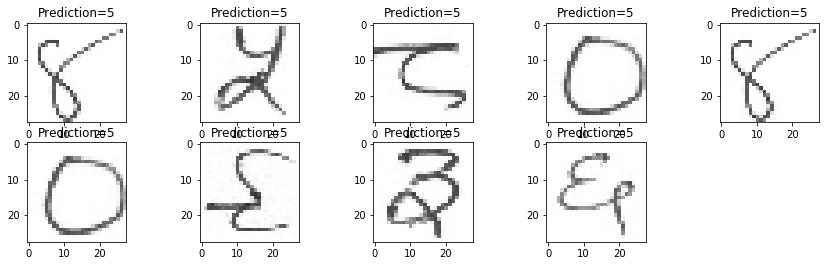

In [78]:
fig = plt.figure(figsize=(15,15))
for i in range(1,10):
    img = train_generator[i][0][0].reshape(28, 28)
    fig.add_subplot(7,5,i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title('Prediction='+str(train_preds[i-1]))
plt.show()

In [79]:
import cv2 

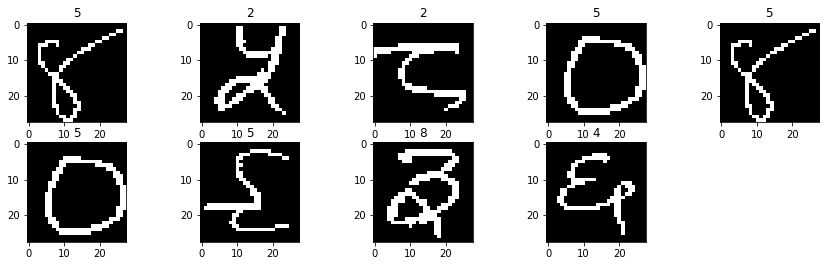

In [137]:
#train_preds = new_model.predict_generator(train_generator)
#train_preds = np.argmax(train_preds, axis = 1)
#print(train_preds)

fig = plt.figure(figsize=(15,15))
for i in range(1,10):
    img = train_generator[i][0][0].reshape(28, 28)
    ret,img = cv2.threshold(img,0.85,1,cv2.THRESH_BINARY_INV) 
    #kernel = np.ones((2,2), np.uint8) 
    #img = cv2.dilate(img, kernel, iterations=1)
    
    fig.add_subplot(7,5,i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    
    img = np.expand_dims(img, 0)
    img = np.expand_dims(img, -1)

    
    train_preds = new_model.predict(img)
    plt.title(np.argmax(train_preds))
plt.show()

In [132]:
img.shape

(1, 28, 28, 1)

[[[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [0.9960785 ]
   ...
   [0.8196079 ]
   [0.37647063]
   [1.        ]]

  ...

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]]


 [[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[1.        ]
   [1.        ]
   [0.9

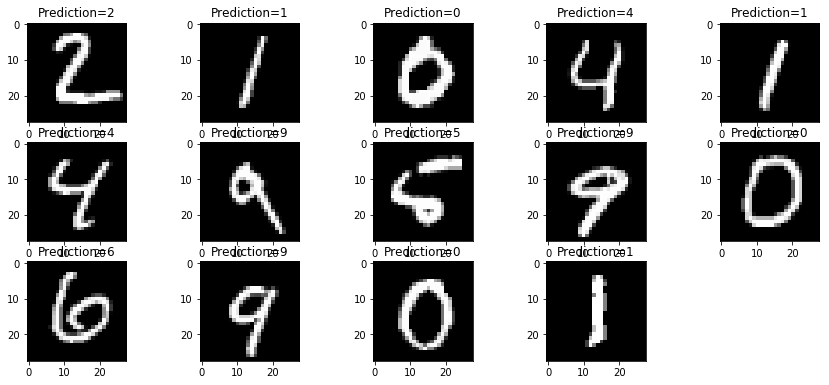

In [109]:
mnist_preds = new_model.predict(test_x)
mnist_preds = np.argmax(mnist_preds, axis = 1)
print(train_generator[1][0])

fig = plt.figure(figsize=(15,15))
for i in range(1,15):
    img = test_x[i].reshape(28, 28)
    #ret,img = cv2.threshold(img,0.85,1,cv2.THRESH_BINARY_INV) 
    #kernel = np.ones((3,3), np.uint8) 
    #img = cv2.dilate(img, kernel, iterations=1) 
    fig.add_subplot(7,5,i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title('Prediction='+str(mnist_preds[i]))
plt.show()